In [1]:
import sys
sys.path.append('../')
from data_loader import DataLoader
import random
import configparser
from feature_selector import BaselineSelector, AnalysisSelector
from feature_selector import FeatureExtractor
import numpy as np
from utils import parse_config_features
import pandas as pd 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [3]:
X = pd.read_csv(config['Data']['features_path'])
y = np.load(config['Data']['labels_path'])

In [4]:
print(len(y[y == 0]), len(y[y == 1]), len(y[y == 2]))

9601 11598 6601


<AxesSubplot:>

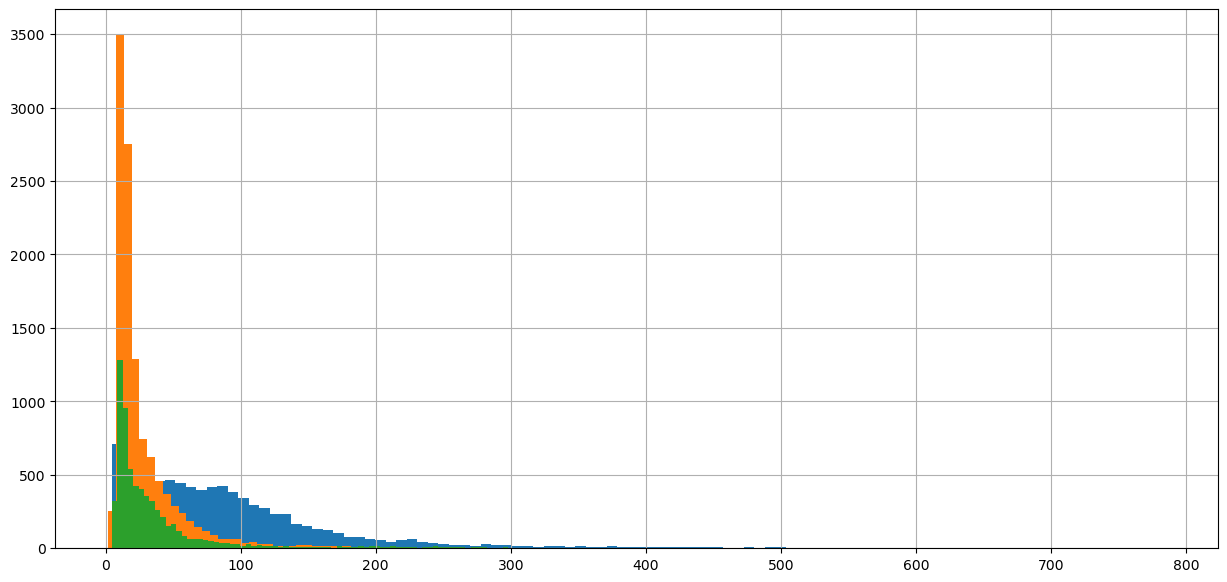

In [13]:
X1 = X[y == 1]
X2 = X[y == 2]
X0 = X[y == 0]

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
X0['hjorth_activity_alpha_9'].hist(bins = 100)
X1['hjorth_activity_alpha_9'].hist(bins = 100)
X2['hjorth_activity_alpha_9'].hist(bins = 100)


In [8]:
from sklearn.feature_selection import mutual_info_classif

In [9]:
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)

In [14]:
print(mutual_info_series[:15])

hjorth_activity_alpha_9       0.130083
hjorth_activity_alpha_14      0.118501
hjorth_activity_beta_9        0.115772
hjorth_activity_alpha_8       0.104876
hjorth_complexity_alpha_9     0.104036
hjorth_activity_beta_14       0.094857
hjorth_complexity_alpha_8     0.091843
hjorth_complexity_alpha_14    0.088476
hjorth_activity_beta_8        0.087692
hjorth_activity_alpha_6       0.085828
hjorth_activity_alpha_15      0.082844
hjorth_activity_beta_12       0.082319
hjorth_complexity_alpha_15    0.081693
hjorth_activity_beta_6        0.078964
hjorth_activity_beta_15       0.077823
dtype: float64


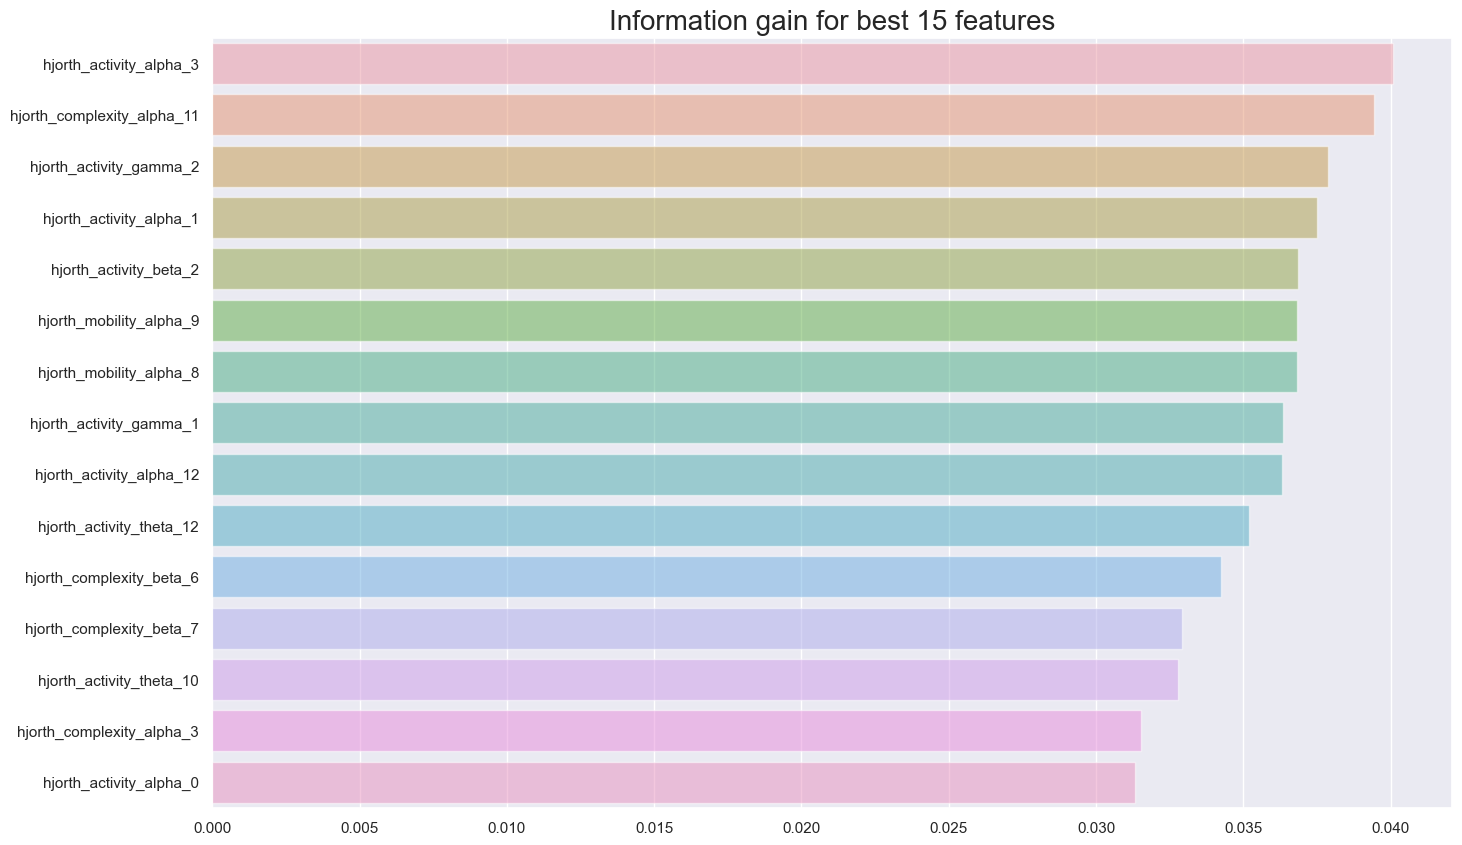

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))
    
plt.grid()
sns.set(style='darkgrid')
plt.grid()
sns.barplot(x=mutual_info_series.values[30:45], y=mutual_info_series.index[30:45], alpha=0.5)

plt.title(f'Information gain for best 15 features', fontdict = {'fontsize' : 20})
plt.savefig(f'data/plots/information_gain/ig_best_15.png', dpi = 300)

In [22]:
print(mutual_info_series.index)
for i, m in enumerate(mutual_info_series.index):
    first = m.split('_')[0]
    if first != 'hjorth':
        print(mutual_info_series.index[i])
        print(mutual_info_series.values[i])

Index(['hjorth_activity_alpha_9', 'hjorth_activity_alpha_14',
       'hjorth_activity_beta_9', 'hjorth_activity_alpha_8',
       'hjorth_complexity_alpha_9', 'hjorth_activity_beta_14',
       'hjorth_complexity_alpha_8', 'hjorth_complexity_alpha_14',
       'hjorth_activity_beta_8', 'hjorth_activity_alpha_6',
       ...
       'hjorth_activity_delta_14', 'hjorth_activity_delta_15',
       'hjorth_activity_delta_18', 'skewness_theta_2', 'skewness_theta_0',
       'skewness_delta_15', 'skewness_delta_14', 'skewness_delta_12',
       'skewness_delta_10', 'skewness_gamma_17'],
      dtype='object', length=476)
kurtosis_alpha_9
0.01574399647296043
skewness_theta_6
0.012127517826199918
skewness_theta_14
0.012044168446140535
skewness_theta_15
0.011777323253596927
skewness_gamma_18
0.011266686380997815
skewness_beta_14
0.010414651541492681
skewness_gamma_11
0.010287498904381742
kurtosis_alpha_8
0.010160123240382513
skewness_theta_9
0.010157327275572614
kurtosis_alpha_14
0.009287919815589296
ku